# INFO 1998: Introduction to ML Final Project
## Group Members: Matt Lim (sl2533) and Joseph Kim (jk2799)
### Project Information
#### Question: Can we predict whether or not a borrower will pay back their loan based on a number of factors? 
#### DataSet: https://www.kaggle.com/datasets/itssuru/loan-data?datasetId=1340957&sortBy=voteCount
#### 

### Import Necessary Packages

In [84]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data Preprocessing and Manipulation

In [25]:
#Load the data and show head
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [53]:
#see the distribution of the data
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [63]:
#check for null entries in the dataset 
null_counts = df.isnull().sum()
print(null_counts)

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


#### In general, there was not much data preprossing/manipulation that was necessary as the dataset came with no null values and seems to be distributed well with no outliers

### Visualizations

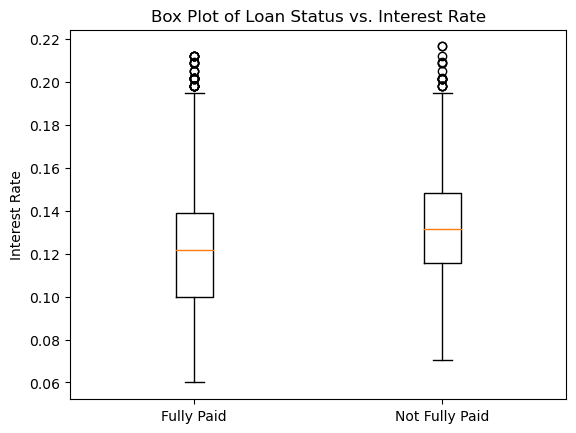

In [64]:
#box plot of loan status vs. interest rate
fully_paid = df[df['not.fully.paid'] == 0]['int.rate']
not_fully_paid = df[df['not.fully.paid'] == 1]['int.rate']

fig, ax = plt.subplots()
ax.boxplot([fully_paid, not_fully_paid], labels=['Fully Paid', 'Not Fully Paid'])
ax.set_ylabel('Interest Rate')
ax.set_title('Box Plot of Loan Status vs. Interest Rate')
plt.show()

#### We see from the results above the difference in interest rate with entries that were fully paid and not fully paid

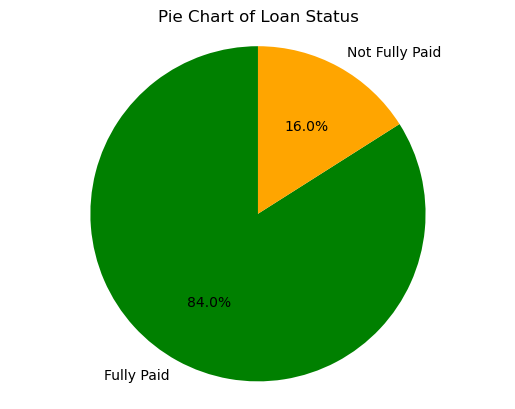

In [65]:
#pie chart of not.fully.paid
counts = df['not.fully.paid'].value_counts()
percentages = [counts[0]/len(df), counts[1]/len(df)] # assuming 0 means fully paid and 1 means not fully paid

labels = ['Fully Paid', 'Not Fully Paid']
colors = ['green', 'orange']

plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Loan Status')
plt.show()

#### the above pie chart shows us the count of not fully paid and fully paid loans

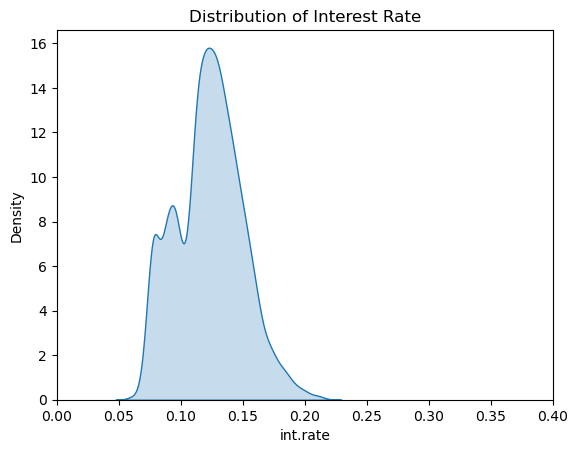

<Figure size 640x480 with 0 Axes>

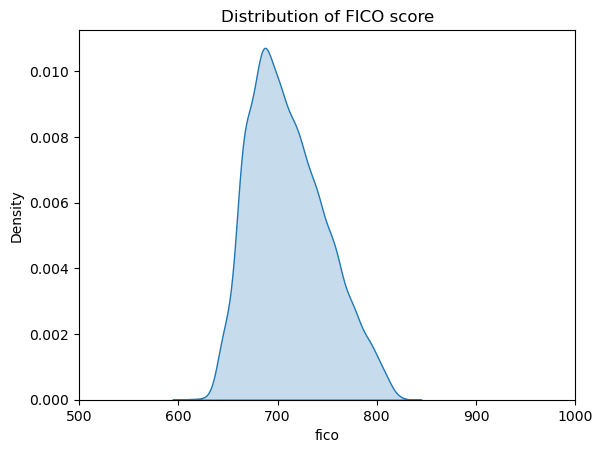

/Users/milttam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


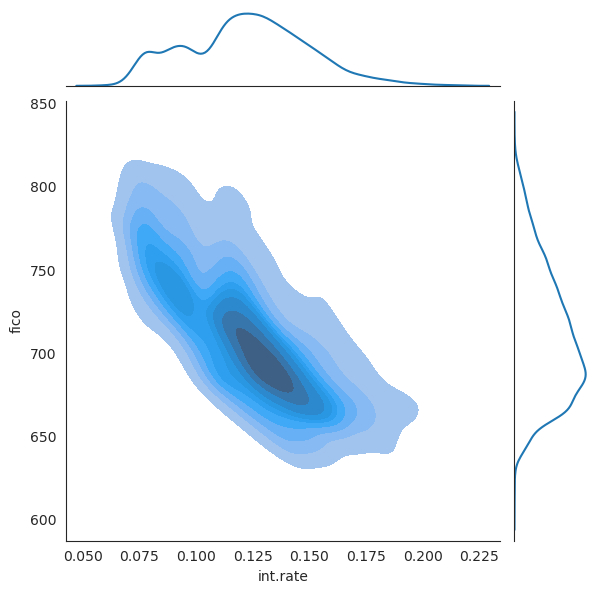

In [78]:
#Visualization 
#show the individual distributions for interst rate and fico score 
# AND the joint distribution 

data = df[["int.rate","fico"]]

#distribution for interest rate
fig, ax = plt.subplots()
sns.kdeplot(data["int.rate"], shade=True,ax = ax)
ax.set_xlim(0,0.4)
plt.title("Distribution of Interest Rate")
plt.show()

#distribution for fico score
plt.figure()
fig, ax = plt.subplots()
sns.kdeplot(data["fico"], shade=True,ax = ax)
ax.set_xlim(500,1000)
plt.title("Distribution of FICO score")
plt.show()

#joint distribution between fico and interest rate 
with sns.axes_style('white'):
    sns.jointplot("int.rate", "fico", data, kind='kde',shade=True)
#plt.title("Joint Distribution of Interest Rate and FICO score",y=1)
plt.show()


#### The above distributions show us the variance and relationship between interest rate and fico score which can be possibly used for model optimization

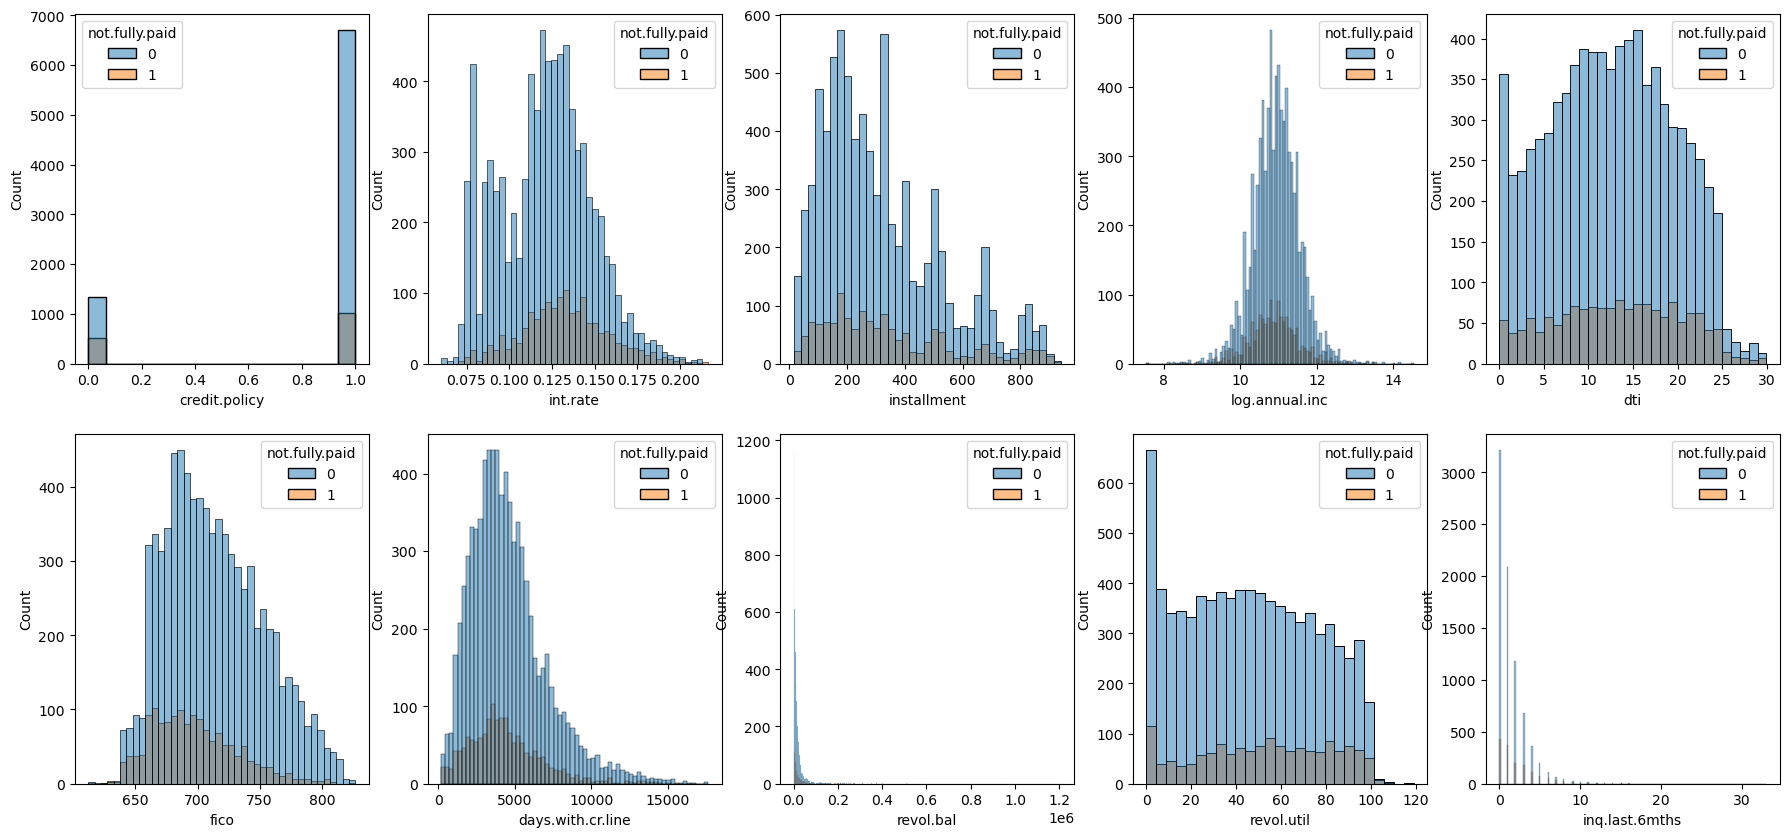

In [80]:
#Create Histograms for all different columns with indicators for not fully paid and fully paid entries 
numbers = df.select_dtypes(['int64', 'float64']).columns
numbers = numbers[:-3]

fig, ax = plt.subplots(2,5, figsize=(22,10))
ax=ax.ravel()

count=0
for i in numbers:
    sns.histplot(data=df, x=i, hue='not.fully.paid', ax=ax[count])
    count+=1

#### the above histograms show us the density of certain features between fully and not fully paid loans

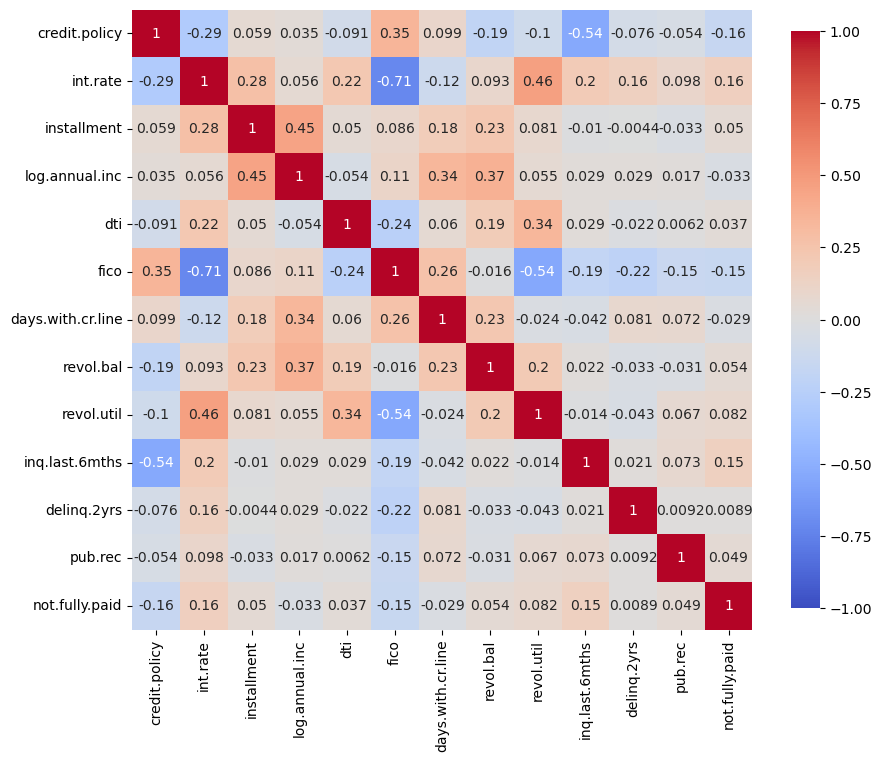

In [26]:
#create correlation matrix 
#Visualization 1
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax, square=True, cbar_kws={"shrink": .75}, vmin=-1, vmax=1)
plt.show()

#### The final visualization shows us the correlation between certain entries which will be used for model tuning and optimization

### Modeling 

### Logistic Regression
#### We first considered using a Logistic Regression model since our target is binary in that we are looking to predict whether or not the loan was or not paid back. In other words, we have a classification problem. 
#### For the features, we initially decided to use all columns. After tuning the model to optimize accuracy by selecting certain features with higher correlation, we decided to stick with using all columns as features
#### To impolement the model, we used scikit-learn Logistic Regression model and calculated the training score and testing score which both produced a score of around 0.84. Yay!

In [81]:
#Create Logistic Regression model 

#Use all features for now in train test split 
#df = df.drop("purpose",axis=1)

X = df.drop('not.fully.paid',axis =1)
Y = df['not.fully.paid']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .4, random_state = 420)

model = LogisticRegression()

model.fit(X_train,Y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))


Test Accuracy:  0.837160751565762
Training Accuracy:  0.8400626522798469


### Decision Tree Classifer
#### The reason we chose the Decision Tree model for this application is that it is a simple and interpretable model that can handle our binary target and continuous/binary features. It is also useful for identifying important features for classification, which can help with feature selection in other models. By iterating through different depth values, we can determine the optimal depth value for our decision tree model, which can improve its accuracy in predicting the target variable.

In [95]:
depth_values = []
accuracy_scores = []


# Iterate through the depth values from 1 to 20
for depth in range(1, 21):
    # Create a decision tree classifier with the given depth
    model = DecisionTreeClassifier(max_depth=depth)

    # Fit the classifier to the training data
    model.fit(X_train, Y_train)

    # Predict the target variable on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score and append it to the accuracy scores list
    accuracy = model.score(X_test, Y_test)
    accuracy_scores.append(accuracy)

    # Append the depth value to the depth values list
    depth_values.append(depth)
    
print(f'Best Score for Decision Tree model: {max(accuracy_scores)}')
print(f'Best Depth for Decision Tree model: {accuracy_scores.index(max(accuracy_scores))+1}')


Best Score for Decision Tree model: 0.7174934725848564
Best Depth for Decision Tree model: 1


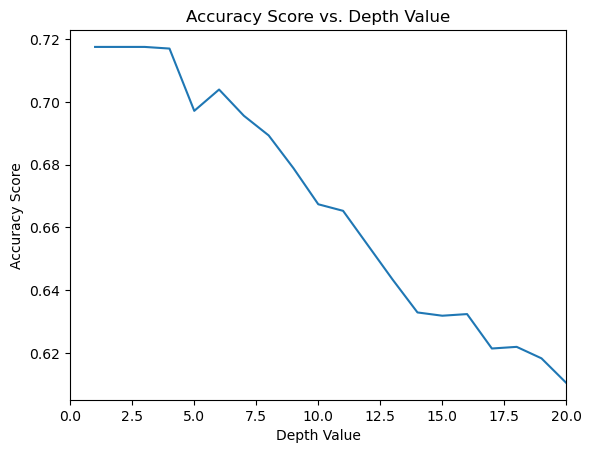

In [94]:
# Plot the depth values against the accuracy scores
plt.plot(depth_values, accuracy_scores)
plt.title('Accuracy Score vs. Depth Value')
plt.xlabel('Depth Value')
plt.ylabel('Accuracy Score')
plt.xlim(0,20)
plt.show()

#### As we see, the best accuracy of the model is when the depth is equal to 1, which means that the model only makes 1 decision partitioning the data to make a decision to predict our target. Compared to our logisitc regressino model, the score was significantly less. As the depth increases, the score only gets worse. So, we concuded that a decision tree model is not the best model for this dataset. 

### KNN Model 

#### The code below uses K-Nearest Neighbors (KNN) classification to determine the optimal value of n_neighbors and the accuracy score for a dataset that contains information about loans and their repayment status. KNN is extremely versitile classification model and therefore can be used to predict whether or not the loan was paid or not.

#### By training a KNN model with different values of n_neighbors and evaluating the accuracy score for each value, the code is able to determine the optimal number of neighbors for the model to use when predicting whether or not a loan will be paid back.

#### The results show that the optimal value of n_neighbors for this loan repayment classification task is 12, and the corresponding accuracy score is 0.8379. This means that the KNN model with n_neighbors=12 correctly classified 83.79% of the loans in the test data as either paid back or not paid back based on the loan features in the dataset.

In [83]:
#Use KNN model to determine the best score and n-groups 

bestN = 2
best_score = 0

for n in range(2,20):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test,pred)
    if score > best_score:
        bestN = n
        best_score = score

print(f'Best N: {bestN}')
print(f'Best Score: {best_score}')

Best N: 12
Best Score: 0.8379436325678496


### Model Validation and Error Analysis 
#### K-Fold Cross Validation 
#### The 5-fold cross validation method was used in the code belowto validate the performance of the optimized KNN classification model with n=12 that predicts the loan repayment status based on various loan features. Cross validation is a widely used method for evaluating the performance of a model on a given dataset, and 5-fold cross validation is a common choice todo so. By splitting the data into 5 subsets, the model is trained and tested on different subsets to assess its generalizability to new data. The error rate calculated from cross validation provides an estimate of the model's accuracy and helps identify potential issues with overfitting or underfitting.

In [87]:
#Use 5-fold cross validation to determine the error of the model 

# Fill in code here
kf = KFold(n_splits=5)
errors = 0
for train_index, test_index in kf.split(X):
    # TODO: define X_train, X_test, Y_train, Y_test
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y.iloc[train_index]
    Y_test = Y.iloc[test_index]

    # Use the optimized KNN n value 
    model = KNeighborsClassifier(n_neighbors=12)

    model.fit(X_train,Y_train)

    pred_test = model.predict(X_test)
    errors += accuracy_score(Y_test,pred_test)
errors /= 5
print(f'Error : {1 - errors}')

Error rate : 0.1615232452291272


#### The error rate of 0.1615 obtained from the 5-fold cross validation indicates that the KNN model is not overfitting or underfitting the data. The consistency between the error rate and the model's accuracy of 0.84 suggests that the model is performing well on the given dataset and has the potential to generalize well to new data.

### Conclusion
#### In conclusion, our data analysis project aimed to predict whether a loan would be paid off or not based on several factors. We used logistic regression, decision trees, and KNN models to predict the target, but found that KNN and logistic regression models performed the best for this specific application. Through feature engineering and hyperparameter tuning, we were able to improve the accuracy of the models. Our findings indicate that these models could be useful in predicting loan default rates and could potentially aid in making lending decisions. Future work can include further analysis is required to confirm the reliability of these models and to identify other factors that may influence loan default rates.